# Dithering & Half Toning
In this notebook we will demonstrate the implementation of half toning dithering using Floyd–Steinberg dithering, which is based on error diffusion.

This algorithm iterates the pixels from the top left pixel, all the way to the bottom right pixel, and for each one:
- Round each pixel's channel, to the closest integer between 0 and 255.
- Calculate the "error" of each channel - which is the delta between the new value and the old one.
- "Spread" the error to the neighbor pixels with the following weights:
$$ \begin{bmatrix}
0 & * & \frac{7}{16} \\
\frac{3}{16} & \frac{5}{16} & \frac{1}{16} 
\end{bmatrix}  $$

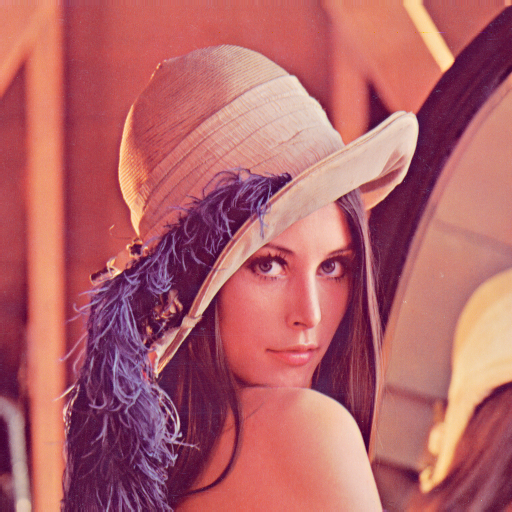

In [2]:
import numpy as np
from PIL import Image

lenna = Image.open("images/lenna.png")
lenna

In [7]:
from math import floor


def apply_threshold(value: int) -> int:
    return 255 * floor(value / 128)


def floyd_steinberg_dither(img: Image) -> Image:
    new_img = img.convert("RGB")
    img_mat = new_img.load()

    width, height = new_img.size

    for j in range(1, height):
        for i in range(1, width):
            pixel = np.array(img_mat[i, j])
            red_oldpixel, green_oldpixel, blue_oldpixel = img_mat[i, j]

            red_newpixel = apply_threshold(red_oldpixel)
            green_newpixel = apply_threshold(green_oldpixel)
            blue_newpixel = apply_threshold(blue_oldpixel)

            img_mat[i, j] = red_newpixel, green_newpixel, blue_newpixel

            red_error = red_oldpixel - red_newpixel
            blue_error = blue_oldpixel - blue_newpixel
            green_error = green_oldpixel - green_newpixel

            if i < width - 1:
                red = img_mat[i + 1, j][0] + round(red_error * 7 / 16)
                green = img_mat[i + 1, j][1] + round(green_error * 7 / 16)
                blue = img_mat[i + 1, j][2] + round(blue_error * 7 / 16)

                img_mat[i + 1, j] = (red, green, blue)

            if i > 1 and j < height - 1:
                red = img_mat[i - 1, j + 1][0] + round(red_error * 3 / 16)
                green = img_mat[i - 1, j + 1][1] + round(green_error * 3 / 16)
                blue = img_mat[i - 1, j + 1][2] + round(blue_error * 3 / 16)

                img_mat[i - 1, j + 1] = (red, green, blue)

            if j < height - 1:
                red = img_mat[i, j + 1][0] + round(red_error * 5 / 16)
                green = img_mat[i, j + 1][1] + round(green_error * 5 / 16)
                blue = img_mat[i, j + 1][2] + round(blue_error * 5 / 16)

                img_mat[i, j + 1] = (red, green, blue)

            if i < width - 1 and j < height - 1:
                red = img_mat[i + 1, j + 1][0] + round(red_error * 1 / 16)
                green = img_mat[i + 1, j + 1][1] + round(green_error * 1 / 16)
                blue = img_mat[i + 1, j + 1][2] + round(blue_error * 1 / 16)

                img_mat[i + 1, j + 1] = (red, green, blue)
    return new_img

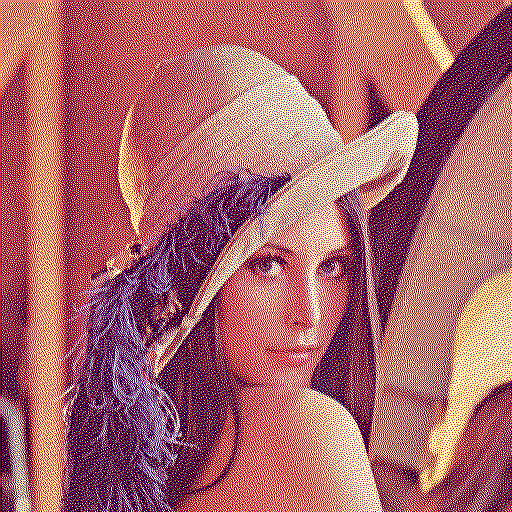

In [8]:
floyd_steinberg_dither(lenna)